# Part III, Lab 3
## Moments of distribution
1. create functions for mean, var and skew
2. apply your functions to a standard normal distribution of 1000 values
2. check your skew function against `scipy.stats.skew`

In [4]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [5]:
def mean(x):
    N = len(x)
    return sum(x)/N

In [6]:
def variance(x):
    N = len(x)
    return sum((x-mean(x))**2)/(N-1)

In [7]:
def skew(x):
    N = len(x)
    
    return (1/N)*(sum(((x-mean(x))/sqrt(variance((x))))**3))

In [8]:
x = random.standard_normal(1000)

In [9]:
print(mean(x), variance(x), skew(x))


0.0560127577877 0.949596013497 -0.112609366845


In [10]:
from scipy import stats

stats.skew(x)

-0.11277849228485308

## Standard normal distribution
1. Create a distribution by adding to a first set of 500 data values that represent a standard normal distribtion a second distribution that you obtain by applying the following operation: $a \rightarrow 0.5a-1.5$. Make a histogram of that combined distribution with 20 bars.
2. Calculate the skew. Repeat the same exercise but applying for the second set the operation $a \rightarrow 0.3a+2.$

In [11]:
vals = random.standard_normal(500)

In [12]:
vals2 = 0.5*vals - 1.5

In [13]:
all_vals = array([vals, vals2])


<IPython.core.display.Javascript object>


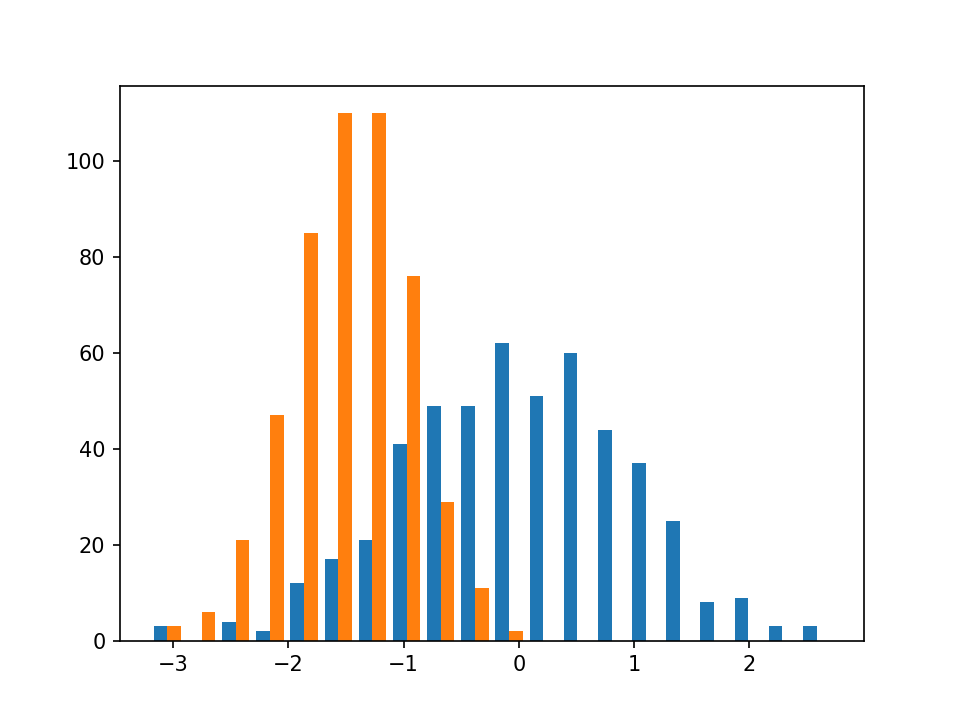

[array([  3.,   0.,   4.,   2.,  12.,  17.,  21.,  41.,  49.,  49.,  62.,
         51.,  60.,  44.,  37.,  25.,   8.,   9.,   3.,   3.]),
 array([   3.,    6.,   21.,   47.,   85.,  110.,  110.,   76.,   29.,
          11.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.])]

In [14]:
ifig=1;close(ifig);figure(ifig)

n=20
plt.hist([all_vals[0], all_vals[1]],n)[0] #plots the distribution and the altered distribution together so you can see the change

<IPython.core.display.Javascript object>


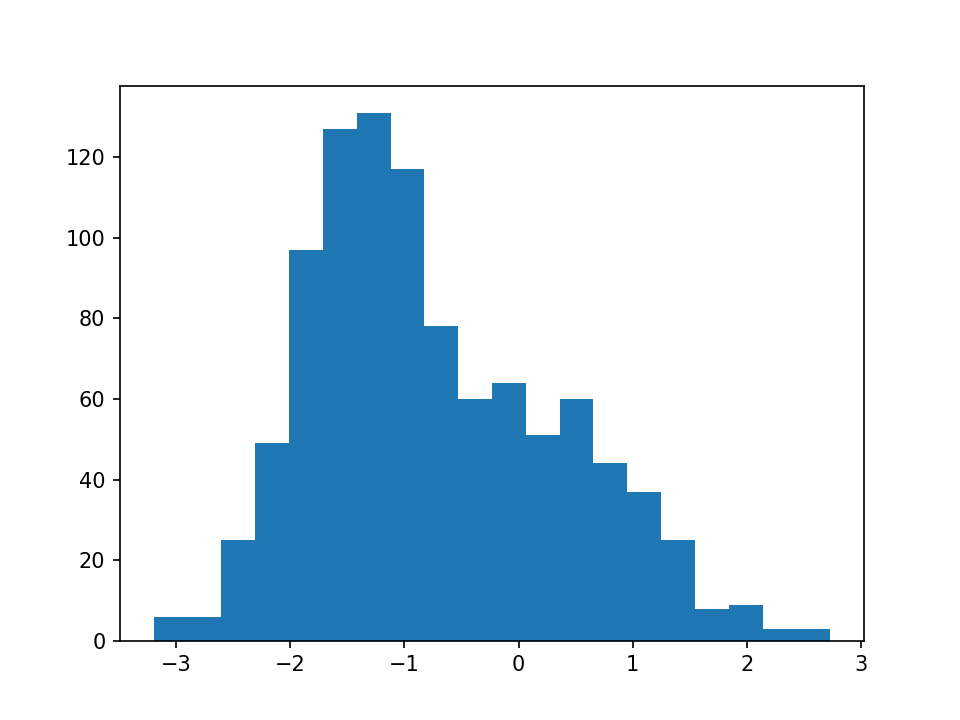

In [15]:
ifig=2;close(ifig);figure(ifig)
xcounts1, xbins1, _ = plt.hist(all_vals.flatten(), n)

In [16]:
skew(all_vals)

0.015811590346136255

In [17]:
vals3 = 0.3*vals + 2

In [18]:
allvals = array([vals, vals3])

<IPython.core.display.Javascript object>


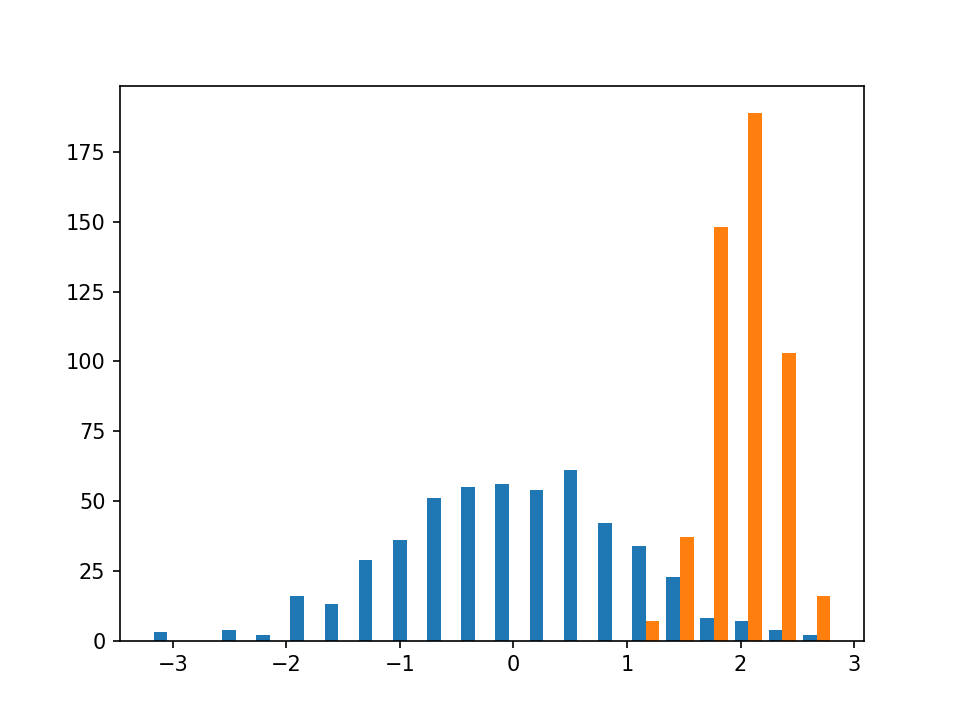

([array([  3.,   0.,   4.,   2.,  16.,  13.,  29.,  36.,  51.,  55.,  56.,
          54.,  61.,  42.,  34.,  23.,   8.,   7.,   4.,   2.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    7.,   37.,  148.,  189.,
          103.,   16.])],
 array([-3.19684177, -2.89602589, -2.59521   , -2.29439411, -1.99357823,
        -1.69276234, -1.39194646, -1.09113057, -0.79031468, -0.4894988 ,
        -0.18868291,  0.11213297,  0.41294886,  0.71376475,  1.01458063,
         1.31539652,  1.6162124 ,  1.91702829,  2.21784418,  2.51866006,
         2.81947595]),
 <a list of 2 Lists of Patches objects>)

In [19]:
ifig=3;close(ifig);figure(ifig)

n=20
plt.hist([allvals[0], allvals[1]],n) #does the same for the second change


<IPython.core.display.Javascript object>


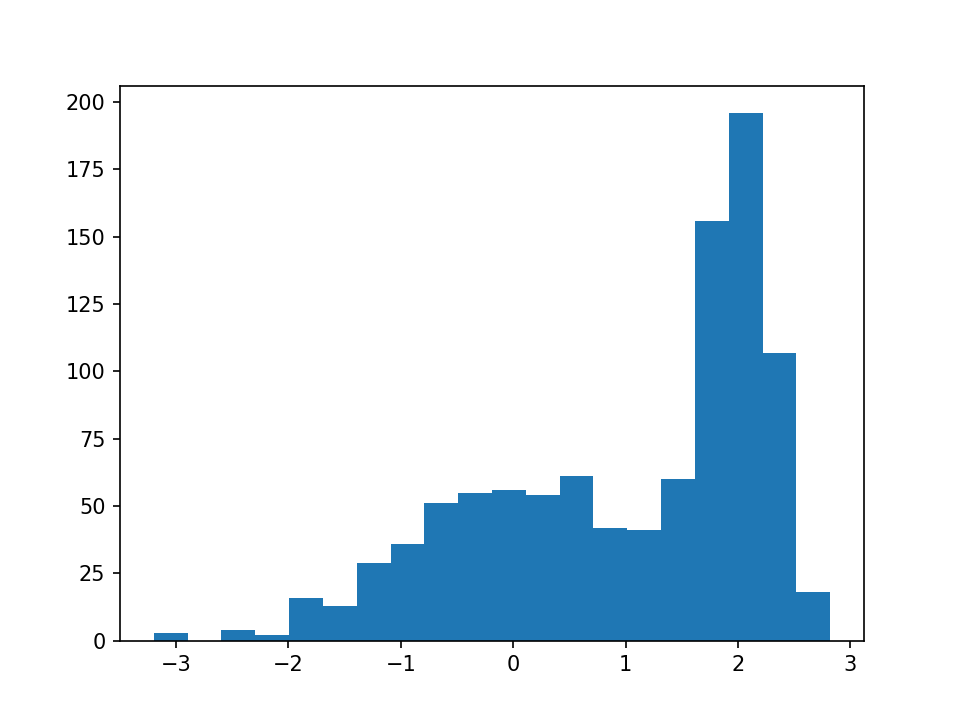

In [20]:
ifig=4;close(ifig);figure(ifig)
xcounts2, xbins2, _ = plt.hist(allvals.flatten(), n)
plt.show()

In [21]:
xcounts2

array([   3.,    0.,    4.,    2.,   16.,   13.,   29.,   36.,   51.,
         55.,   56.,   54.,   61.,   42.,   41.,   60.,  156.,  196.,
        107.,   18.])

## Least-square fitting
Fit a Gaussian (propability denisty of the normal distribution) to bpth skewed distributions from the previous part.

In [22]:
def gaussian(x,mu,var):
    thing = sqrt(2*pi*var)
    thang = -(x-mu)**2/(2.*var)
    return exp(thang)/thing #definition of a gaussian function I think

In [23]:
normdata1 = xcounts1/(sum(diff(xbins1)*xcounts1))

In [24]:
normdata2 = xcounts1/(sum(diff(xbins2)*xcounts2))

In [25]:
from scipy.optimize import curve_fit

In [26]:
(meanfit, varfit), _ = curve_fit(gaussian, xbins1[0:-1], normdata1, p0 = [0,1])

<IPython.core.display.Javascript object>


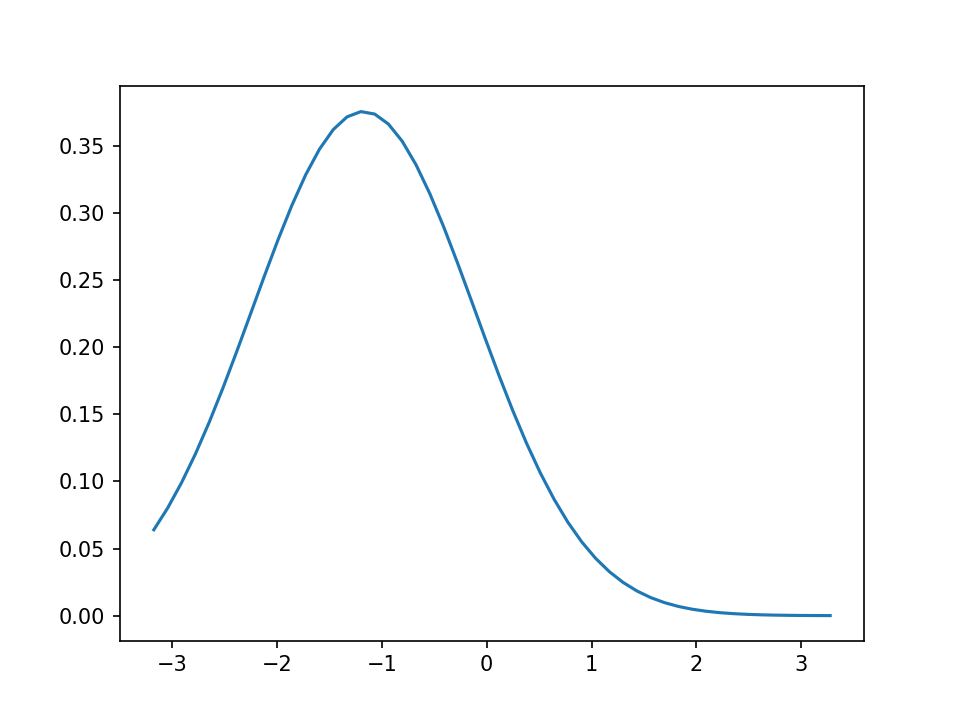

In [27]:
xx = linspace(min(x), max(x), 50)

plt.close()
ifig=5;close(ifig);figure(ifig)
plt.plot(xx, gaussian(xx, meanfit, varfit))
plt.show()

In [28]:
#Just did it for one of them

## Linear correlation


1. create a point cloud by plotting to normal distribtions against each other. Each as 500 values.
2. Create a linear shear mapping transformation matrix `T2 = matrix([[1,1.],[0,1]])` to these double-normal (x,y) data points. Plot both data sets in one plot.
3. Write a function that calculates Pearson's r correlation coeffecient. Calculate the coefficent for both data sets. 
4. Compare your result with the equivalent `scipy.stats` routine.

<IPython.core.display.Javascript object>


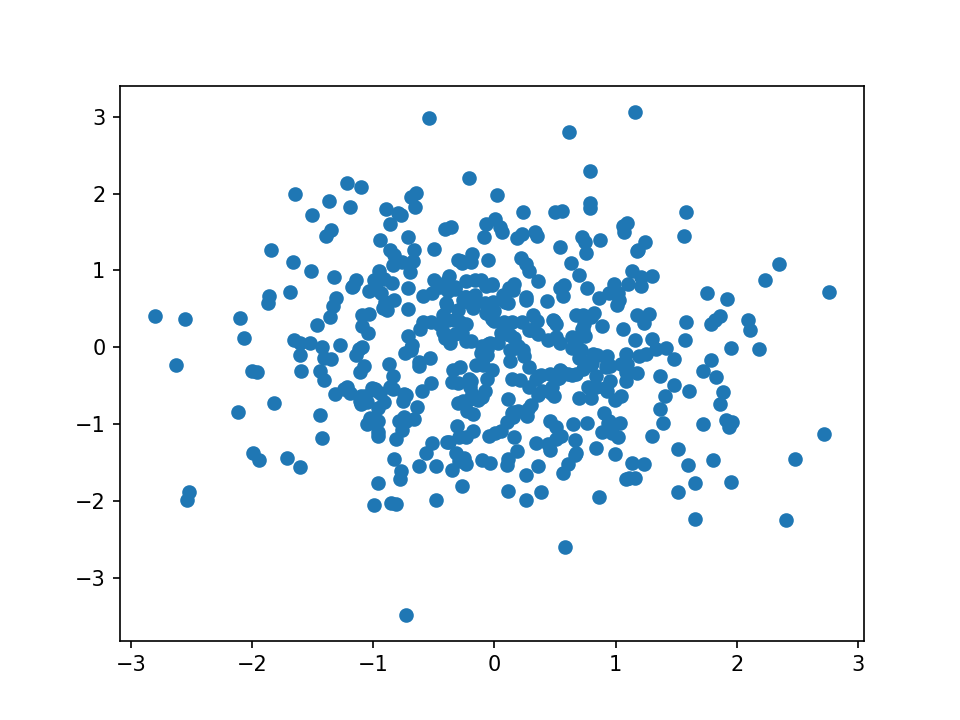

In [29]:
#creating the point cloud
ifig=6;close(ifig);figure(ifig)
a = random.standard_normal(500)
b = random.standard_normal(500)
plt.scatter(a, b) 

In [30]:
T2 = matrix([[1,1.],[0,1]])
shear = dot(T2, (a,b)).T

In [31]:
shear[:,0]

matrix([[ 0.2154972 ],
        [-2.49648513],
        [ 2.15763552],
        [-1.5340212 ],
        [ 0.03260803],
        [ 0.36809604],
        [ 0.95002153],
        [ 1.61925582],
        [-3.04762635],
        [-0.15335336],
        [-1.2675516 ],
        [-0.37635103],
        [ 2.43520099],
        [-0.72718113],
        [-1.53957402],
        [ 0.57497508],
        [-0.36639744],
        [ 1.31584507],
        [-0.519071  ],
        [-0.02687606],
        [ 0.13243158],
        [ 2.61471308],
        [ 0.52490897],
        [ 0.53663977],
        [ 0.22830886],
        [-0.81719224],
        [ 0.14340833],
        [ 1.09203062],
        [-1.7065125 ],
        [-0.88356076],
        [ 0.70957696],
        [ 1.41734504],
        [-1.84014136],
        [ 0.77424096],
        [-0.04566806],
        [ 2.64264353],
        [ 0.00981004],
        [-0.74837235],
        [ 0.69496022],
        [-0.4096221 ],
        [ 0.91874992],
        [ 2.66248548],
        [-0.96531376],
        [-0

<IPython.core.display.Javascript object>


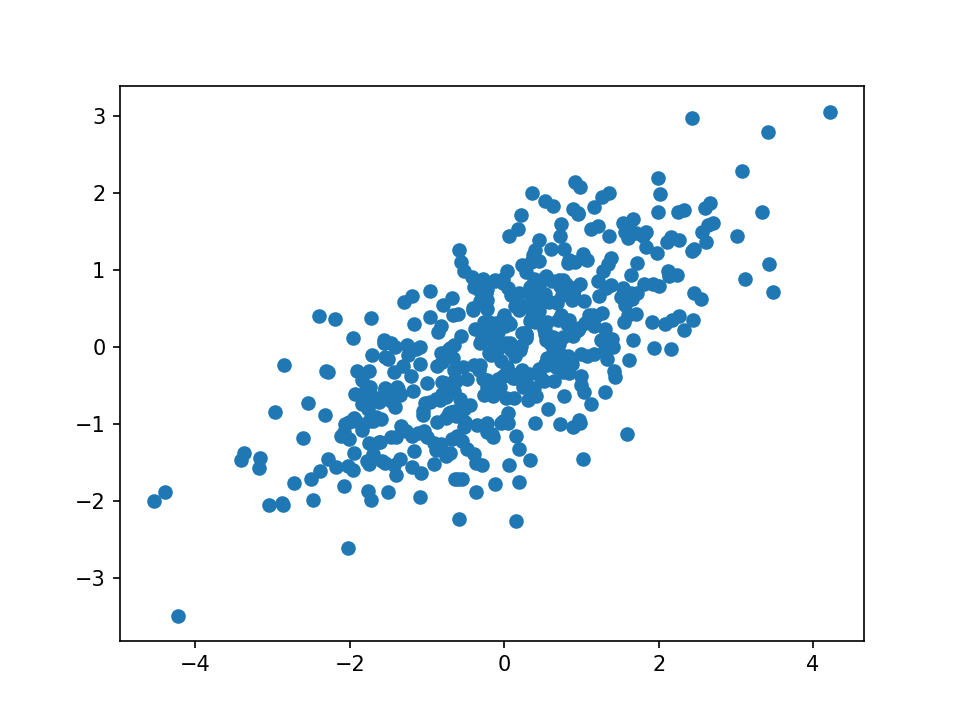

In [32]:
ifig=7;close(ifig);figure(ifig)
plt.plot(shear[:,0], shear[:,1], 'o')
plt.show()

In [36]:
def pearsonsR(x, y):
    xbar = mean(x)
    ybar = mean(y)
    return sum((x-xbar)*(y-ybar))/(sqrt(sum((x-xbar)**2))*sqrt(sum((y-ybar)**2)))

In [37]:
pearsonsR(a,b)

-0.065375793645866528

In [38]:
import scipy.stats as sc

sc.pearsonr(a,b)

(-0.065375793645866528, 0.14435870984606428)